# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#Importing Necessary Libraries

In [ ]:
# Libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Drive Mount and Data Loading


In [ ]:
# Drive Mount
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading Data
file_path1 = ('/content/drive/MyDrive/Project 2/Retail Sales Prediction/Data & Resources/Rossmann Stores Data.csv')
file_path2 = ('/content/drive/MyDrive/Project 2/Retail Sales Prediction/Data & Resources/store.csv')

ross_data = pd.read_csv(file_path1)
store = pd.read_csv(file_path2)

# Exploratory Data Analysis

We have two datasets - 'ross_data' and 'store'. Let's try and understand the basics of these two datasets one by one.

### Data Collection and Preprocessing

Let's check first dataset (ross_data)

In [ ]:
# Top five row
ross_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# No. of rows and columns of ross_data
print('Shape of ross_data is', ross_data.shape)
print('No. of rows in ross_data are', ross_data.shape[0])
print('No. of columns in ross_data are', ross_data.shape[1])

Shape of ross_data is (1017209, 9)
No. of rows in ross_data are 1017209
No. of columns in ross_data are 9


In [ ]:
# Concize summary of ross_data
ross_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Descriptive Stats of ross_data dataset
ross_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


Let's look at the other dataset (store)

In [ ]:
# Top five rows of the dataset
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# No. of rows and columns
print('No of rows in the dataset (store) are', store.shape[0])
print('No of columns in the dataset (store) are', store.shape[1])

No of rows in the dataset (store) are 1115
No of columns in the dataset (store) are 10


In [ ]:
# Descriptive Stats of store dataset
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
# Concise summary of store
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


We can see in the above summary of store dataset that total number of rows are 1115 and we can see many columns with missing or null values. We will deal with these null values in the data cleaning/scrubbing part

### Handling Missing Values

In [ ]:
# Sum of null values
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Now we wll calculate the missing value in percentage of 'store' only beacuse other dataset (ross_data) has no null values.




In [ ]:
# Null value (percentage) of total dataset(store).
(store.isnull().sum()/store.shape[0])*100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

We can see the high percentage of missing/null values in some features of the 'store' dataset. So now we will try to replace these with some suitable values as they won't help in our model. Let's analyse their distribution.

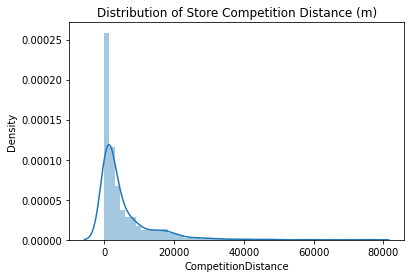

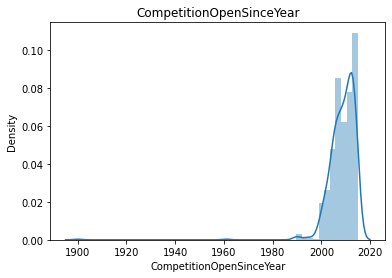

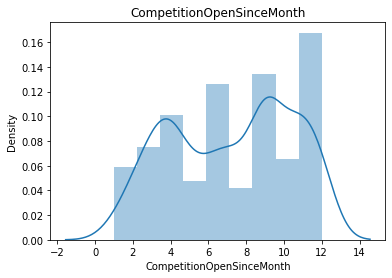

In [ ]:
# Distribution of CompetitionDistance
sns.distplot(store.CompetitionDistance)
plt.title('Distribution of Store Competition Distance (m)')
plt.show()

# # Distribution of CompetitionOpenSinceYear

plt.title('CompetitionOpenSinceYear')
sns.distplot(store.CompetitionOpenSinceYear)
plt.show()

# Distribution of CompetitionOpenSinceMonth

plt.title('CompetitionOpenSinceMonth')
sns.distplot(store.CompetitionOpenSinceMonth)
plt.show()

Dristribution of CompetitionDistance is right skewed so we'll replace the missing values with the median.

In [ ]:
# Replacing missong values with median value
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median() ,inplace = True)

Since the columns 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' both are categorical columns(Months and Years) so we will replace the missing values with mode of particular column and we can see in the code cell below that both columns have only 1 mode.

In [ ]:
# Checking for modes
print(store['CompetitionOpenSinceMonth'].mode())
print(store['CompetitionOpenSinceYear'].mode())

0    9.0
dtype: float64
0    2013.0
dtype: float64


In [ ]:
# Replacing null values with mode
store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
# Head
store.head(10).T

,0,1,2,3,4,5,6,7,8,9
Store,1,2,3,4,5,6,7,8,9,10
StoreType,c,a,a,c,a,a,a,a,a,a
Assortment,a,a,a,c,a,a,c,a,c,a
CompetitionDistance,1270.0,570.0,14130.0,620.0,29910.0,310.0,24000.0,7520.0,2030.0,3160.0
CompetitionOpenSinceMonth,9.0,11.0,12.0,9.0,4.0,12.0,4.0,10.0,8.0,9.0
CompetitionOpenSinceYear,2008.0,2007.0,2006.0,2009.0,2015.0,2013.0,2013.0,2014.0,2000.0,2009.0
Promo2,0,1,1,0,0,0,0,0,0,0
Promo2SinceWeek,NaN,13.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo2SinceYear,NaN,2010.0,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PromoInterval,NaN,"Jan,Apr,Jul,Oct","Jan,Apr,Jul,Oct",NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can observe that 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval' are NaN where Promo2 is zero and they have nearly 50% missing value so we will drop these columns.

In [ ]:
# Dropping columns from store dataset
store.drop('Promo2SinceWeek', axis = 1, inplace = True)
store.drop('Promo2SinceYear', axis = 1, inplace = True)
store.drop('PromoInterval', axis = 1, inplace = True)

In [ ]:
# Null values sum (store)
store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

In [ ]:
# Null values sum (ross_data)
ross_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Value counts in following columns

In [ ]:
# Values Counts
print('DayOfWeek:\n', ross_data['DayOfWeek'].value_counts(), '\n\n' )
print('Open:\n', ross_data['Open'].value_counts(), '\n\n' )

DayOfWeek:
 5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64 


Open:
 1    844392
0    172817
Name: Open, dtype: int64 




In [ ]:
# Value count cont.
print('Promo:\n', ross_data['Promo'].value_counts(), '\n\n' )
print('StateHoliday:\n', ross_data['StateHoliday'].value_counts(), '\n\n')
print('SchoolHoliday:\n', ross_data['SchoolHoliday'].value_counts())

Promo:
 0    629129
1    388080
Name: Promo, dtype: int64 


StateHoliday:
 0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64 


SchoolHoliday:
 0    835488
1    181721
Name: SchoolHoliday, dtype: int64


Checking unique value in StateHoliday because it has two zeros.

In [ ]:
# Checking for unique
ross_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In 'StateHoliday' 0 is repeated so, we will fix this using lambda function.

In [ ]:
# Applying lambda function and checking again
ross_data['StateHoliday'] = ross_data['StateHoliday'].apply(lambda x : 0 if x == '0' else x)
ross_data['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

### Barplot of StateHoliday vs Sales and StateHoliday vs Customers to check significance of different values.


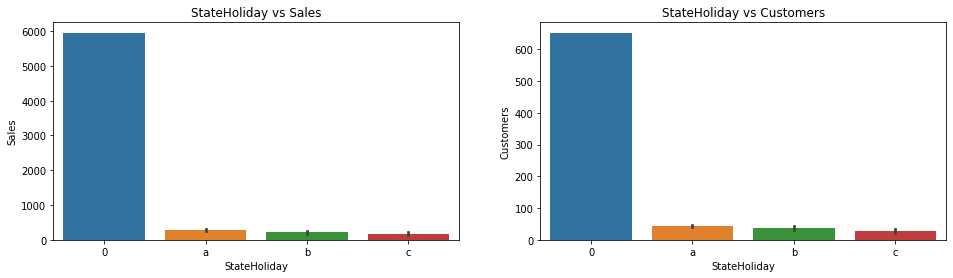

In [ ]:
fig, (state1, state2) = plt.subplots(1,2,figsize= (16,4))

# Barplot of StateHoliday vs Sales
state1.title.set_text('StateHoliday vs Sales')
sns.barplot(x = 'StateHoliday', y = 'Sales', data = ross_data, ax = state1)

# Barplot of StateHoliday vs Customers
state2.title.set_text('StateHoliday vs Customers')
sns.barplot(x = 'StateHoliday', y = 'Customers', data = ross_data, ax = state2)

There is no significant difference in the value of sales of state holiday type a, b and c as compared to '0'. So, we can treat different types of stateholidays in same way. Thus we can replace state holiday type a, b & c by 1 only.

In [ ]:
# Replacing 'a', 'b' and 'c' with 1
ross_data.StateHoliday.replace({'a': 1,
                                'b' : 1,
                                'c' : 1
                                }, inplace = True )

In [ ]:
# Verifying
ross_data['StateHoliday'].value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

In [ ]:
# Extracting of data from 'Date' column
ross_data['Year'] = pd.to_datetime(ross_data['Date']).dt.year
ross_data['Month'] = pd.to_datetime(ross_data['Date']).dt.month
ross_data['Day'] = pd.to_datetime(ross_data['Date']).dt.day
ross_data['WeekofYear'] = pd.to_datetime(ross_data['Date']).dt.weekofyear

### Distribution of 'Sales'

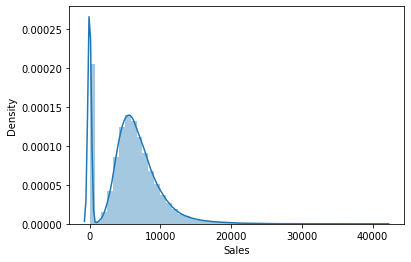

In [ ]:
# distribution plot
sns.distplot(ross_data['Sales'])

### Sales per store type

Text(0.5, 1.0, 'Sales per store type')

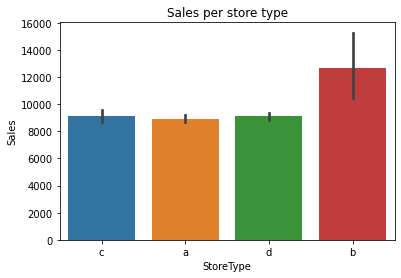

In [ ]:
# Barplot
sns.barplot(x = store['StoreType'], y = ross_data['Sales'])
plt.title('Sales per store type')

### Sales vs Assortment

Text(0.5, 1.0, 'Sales vs Assortment')

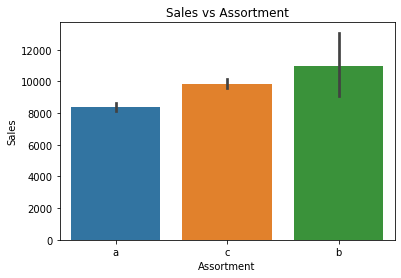

In [ ]:
# Barplot
sns.barplot(x = store['Assortment'], y = ross_data['Sales'])
plt.title('Sales vs Assortment')

### Effect of promotion in sales and number of customers.

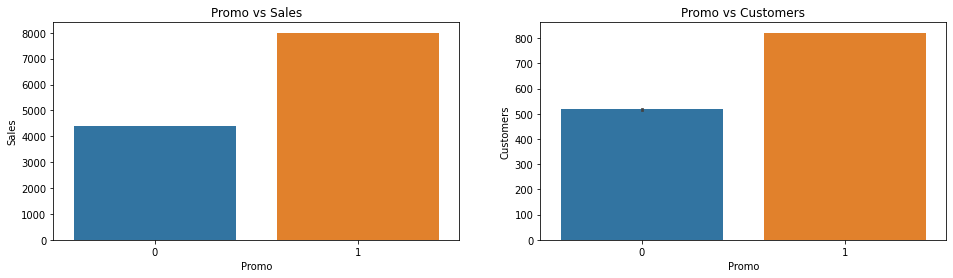

In [ ]:
# Barplot
fig, (fig1, fig2) = plt.subplots(1,2,figsize= (16,4))

# Barplot of Promo vs Sales
fig1.title.set_text('Promo vs Sales')
sns.barplot(x = 'Promo', y = 'Sales', data = ross_data, ax = fig1)

# Barplot of Promo vs Customers
fig2.title.set_text('Promo vs Customers')
sns.barplot(x = 'Promo', y = 'Customers', data = ross_data, ax = fig2)

Here we can observe that Sales and number of customers increase significantly during promo periods. This shows that promotion have a positive effect of stores

### Sales vs holidays
We updated this above


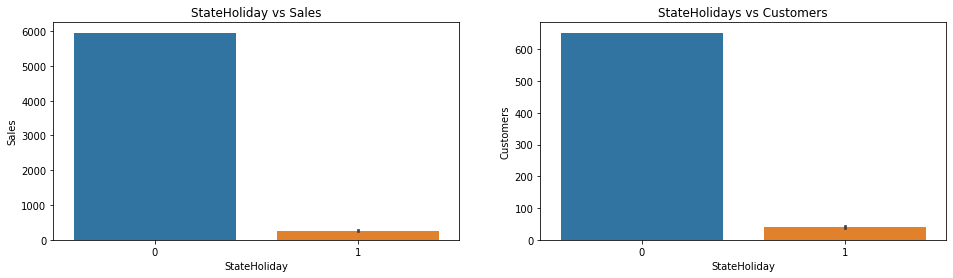

In [ ]:
# Barplot
fig, (fig3, fig4) = plt.subplots(1,2,figsize= (16,4))

# StateHoliday vs Sales
fig3.title.set_text('StateHoliday vs Sales')
sns.barplot(x = 'StateHoliday', y = 'Sales', data = ross_data, ax = fig3)

# StateHoliday vs Customers
fig4.title.set_text('StateHolidays vs Customers')
sns.barplot(x = 'StateHoliday', y = 'Customers', data = ross_data, ax = fig4)

Only a few stores are open on state holidays.



### Sales and number of customers on School Holidays


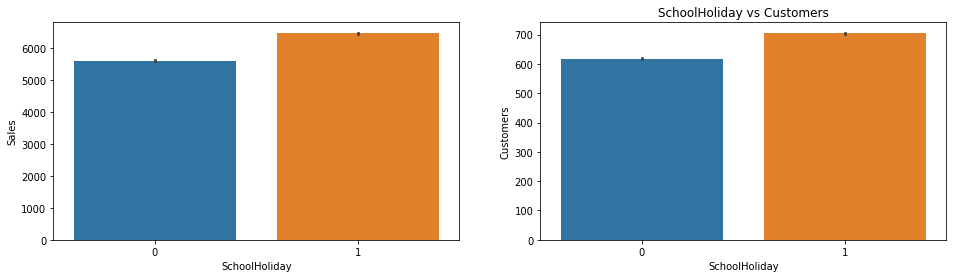

In [ ]:
# Barplot
fig, (fig_1, fig_2) = plt.subplots(1,2,figsize= (16,4))

# SchoolHoliday vs Sales
fig_2.title.set_text('SchoolHoliday vs Sales')
sns.barplot(x = 'SchoolHoliday', y = 'Sales', data = ross_data, ax = fig_1)

# Schoolholiday vs number of customers
fig_2.title.set_text('SchoolHoliday vs Customers')
sns.barplot(x = 'SchoolHoliday', y = 'Customers', data = ross_data, ax = fig_2)

We can observe that there is slight increase in sales and number of customers visiting on school holidays.

### Open stores per day of week

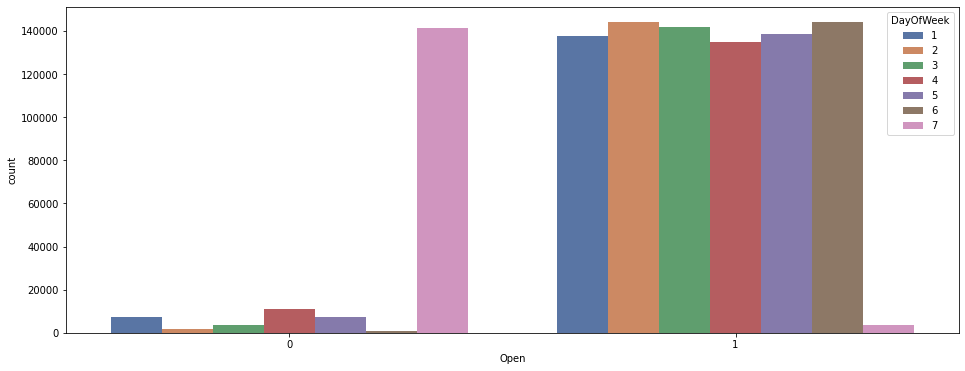

In [ ]:
# Opened and closed stores in a week
fig, (fig6) = plt.subplots(1,1, figsize = (16,6))
sns.countplot(x = 'Open', hue = 'DayOfWeek', data = ross_data, palette= 'deep', ax = fig6)

This countplot clearly shows that majority of stores are closed on sunday. Some stores were also closed on other days of the week may be due to public holidays, as stores are usually closed on public holidays and are open during school vacations.

### Sales and number of customers vs days of week

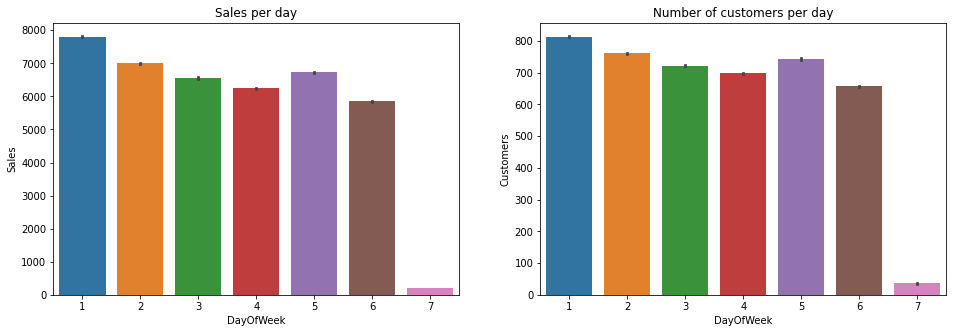

In [ ]:
# Barplot
fig,(figure1, figure2) = plt.subplots(1,2, figsize = (16, 5))

# Sales per day
figure1.title.set_text('Sales per day')
sns.barplot(x = 'DayOfWeek', y = 'Sales', data = ross_data, order = [1,2,3,4,5,6,7], ax = figure1)

# Customers per day
figure2.title.set_text('Number of customers per day')
sns.barplot(x = 'DayOfWeek', y = 'Customers', data = ross_data, order = [1,2,3,4,5,6,7], ax = figure2)

This clearly shows most sales are done with the first days, but very less on the last day due to the closed shops on sunday

### Trend of Average Sales per day of week

Text(0.5, 1.0, 'Average sales by day of the week')

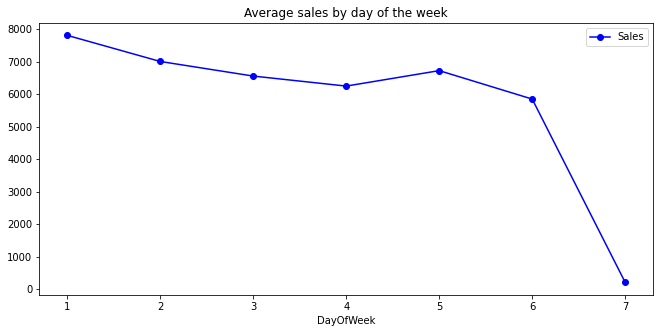

In [ ]:
# Average salesplot
fig_a = ross_data.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (11,5), marker = 'o', color = 'b')
fig_a.set_title('Average sales by day of the week')

### Trend of Average number of customers per day of week

Text(0.5, 1.0, 'Average number of customers per day of the week')

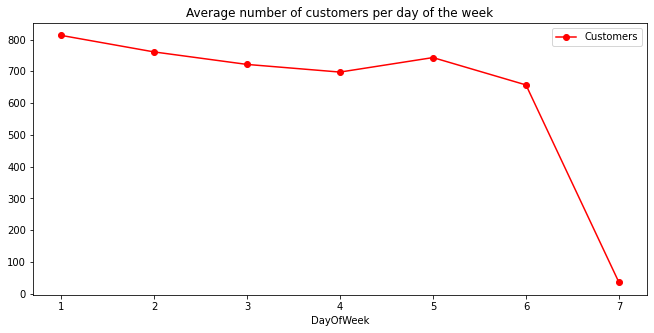

In [ ]:
# Avg customers plot
fig_b = ross_data.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (11,5), marker = 'o', color = 'r')
fig_b.set_title('Average number of customers per day of the week')

### Sales per year


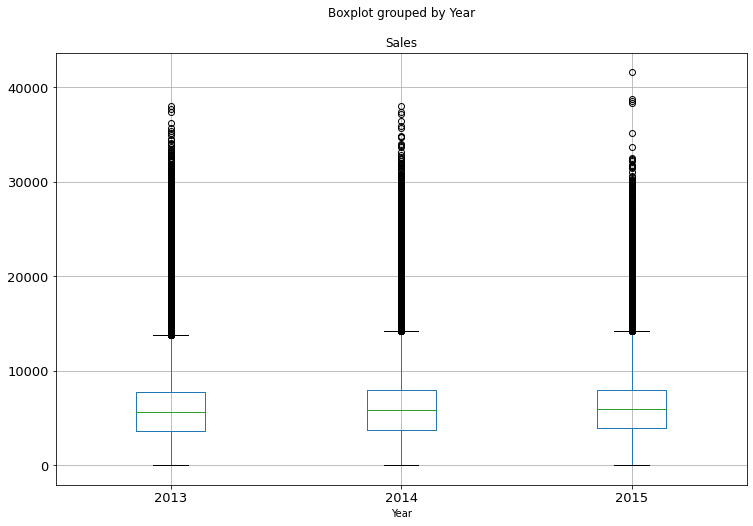

In [ ]:
# Box plot
ross_data.boxplot('Sales', 'Year', figsize= (12,8), fontsize=13 )

### Sales per month

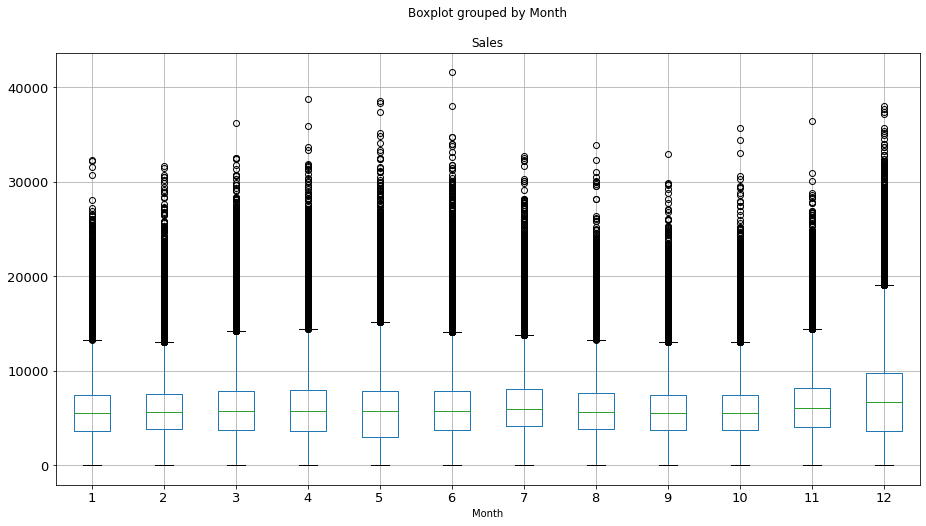

In [ ]:
# Boxplot
ross_data.boxplot('Sales', 'Month', figsize= (15,8), fontsize=13 )

### Trend of Sales per month

Text(0.5, 1.0, 'Average Sales per Month')

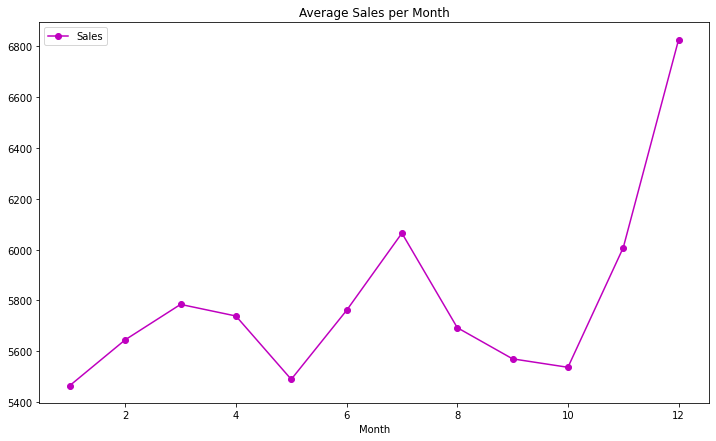

In [ ]:
# Avg sales per month
fig_c = ross_data.groupby('Month')[['Sales']].mean().plot(figsize = (12,7), marker = 'o', color = 'm')
fig_c.set_title('Average Sales per Month')

### Trend of average customers per month

Text(0.5, 1.0, 'Average Customers per Month')

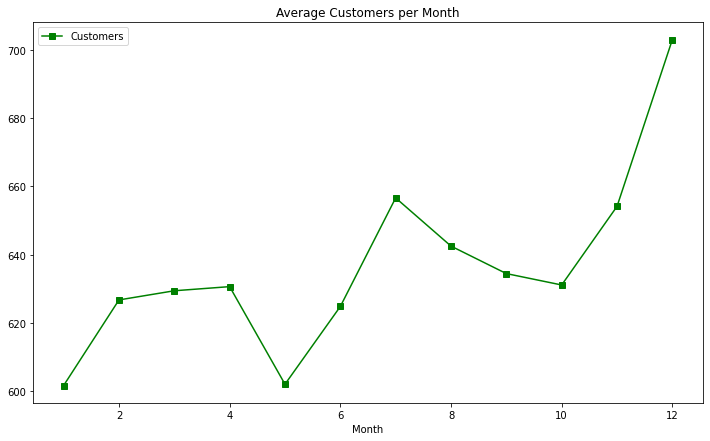

In [ ]:
# Avg customers per month
fig_d = ross_data.groupby('Month')[['Customers']].mean().plot(figsize = (12,7), marker = 's', color = 'g')
fig_d.set_title('Average Customers per Month')

We can observe the significant increase in sales and number of customers in the month of december. This may be because of Christmas Holidays.

### Trend of Average sales per day of Month

Text(0.5, 1.0, 'Average Sales per Day')

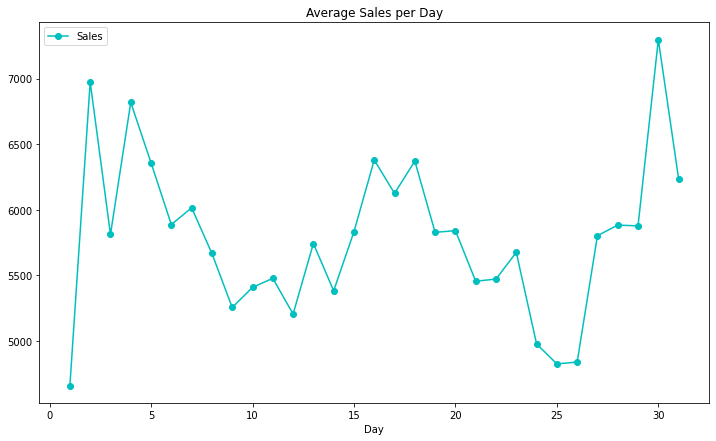

In [ ]:
# Avg sales per day (Monthly)
fig_e = ross_data.groupby('Day')[['Sales']].mean().plot(figsize = (12,7), marker = 'o', color = 'c')
fig_e.set_title('Average Sales per Day')

### Trend of Average customers per day of Month

Text(0.5, 1.0, 'Average Customers per Month')

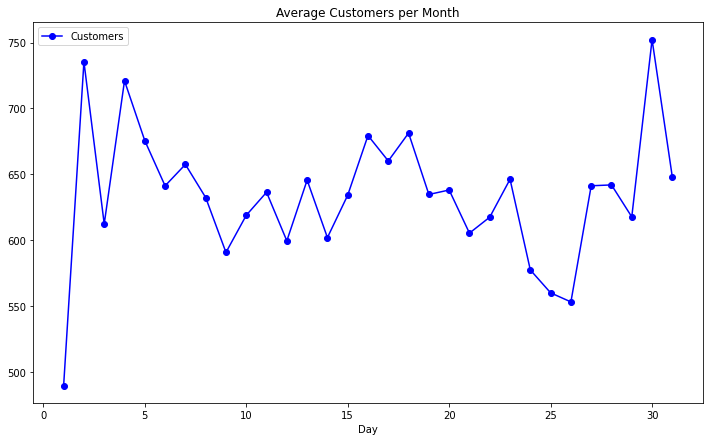

In [ ]:
# Avg customers per day (monthly)
fig3 = ross_data.groupby('Day')[['Customers']].mean().plot(figsize = (12,7), marker = 'o', color = 'b')
fig3.set_title('Average Customers per Month')

### EDA findings:


*   The best-selling and most frequently visited by customers is store of type A.
*   For all stores, promotion leads to increased sales and customers.
*   Sales are strongly correlated to the number of customers.
*   Stores open during school holidays have more sales than on normal days.
*   Each time a store participates in a promotion, we see Sales and number of customers increase significantly.
*   More stores are open during school holidays than on public holidays.
*   Sales increase during Christmas week, this may be due to people buying gifts during a Christmas holidays.


# Feature Engineering

In [ ]:
# Dropping '0' in 'Open' as it indicates that store was closed
openstore_df = ross_data[ross_data['Open'] != 0]

In [ ]:
# we can now drop the column 'Open' as we only included data with 'Open' = 1
openstore_df.drop('Open', axis = 1, inplace = True)

In [ ]:
# Making a Copy
ross_df = openstore_df.copy()

In [ ]:
# head
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekofYear
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,31,31


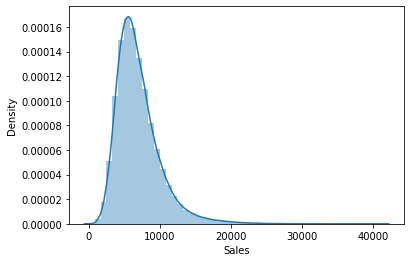

In [ ]:
# Distribution of sales after we drop the closed store.
sns.distplot(ross_df['Sales'])

Distribution of sales after we dropped the closed store. We can see that the spike that was present there is now gone.

In [ ]:
# Checking for infinite values
np.isinf(ross_df['Sales']).sum()

0

In [ ]:
# Checking for null
ross_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
WeekofYear       0
dtype: int64

In [ ]:
# info
ross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Promo          844392 non-null  int64 
 6   StateHoliday   844392 non-null  int64 
 7   SchoolHoliday  844392 non-null  int64 
 8   Year           844392 non-null  int64 
 9   Month          844392 non-null  int64 
 10  Day            844392 non-null  int64 
 11  WeekofYear     844392 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 83.7+ MB


In [ ]:
# Creating a list of all relevant numerical features for linear regg.
num_features = list(ross_df.describe().columns)

# removing 'Store' (ID) and 'Sales' (target variable)
num_features.remove('Store')
num_features.remove('Sales')

num_features

['DayOfWeek',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'WeekofYear']

### Relationship between numerical features and target variable.

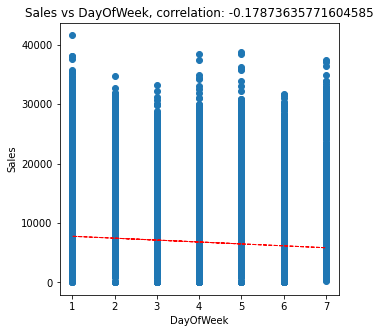

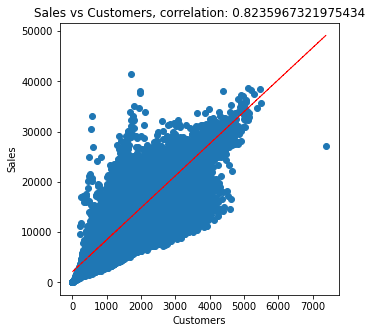

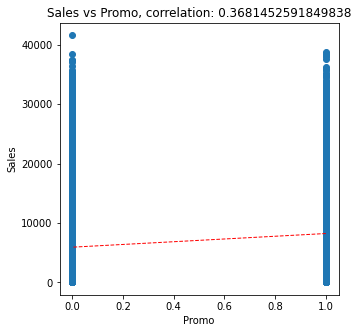

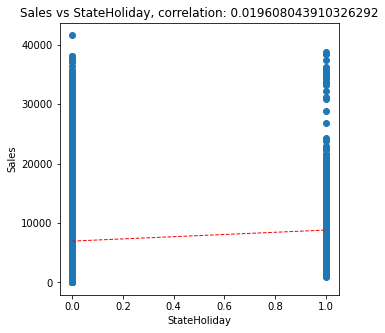

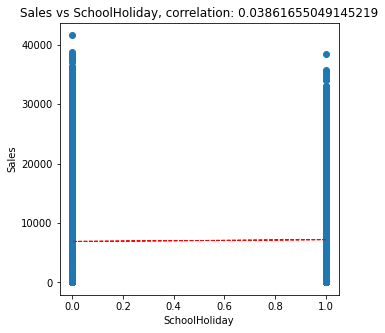

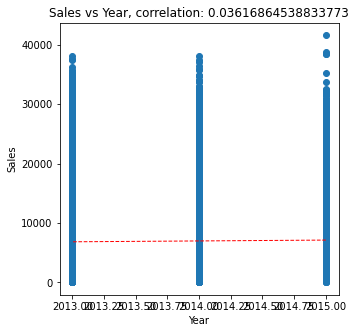

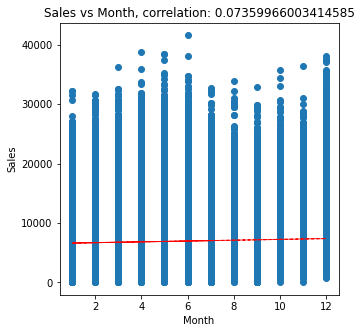

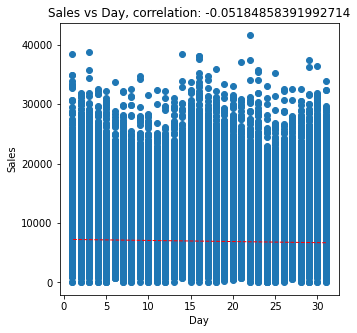

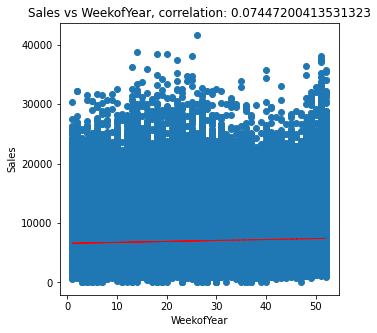

In [ ]:
# # Plotting the relationship between each numerical features and the target (Sales) variable
for i in num_features:
  fig = plt.figure(figsize = (5,5))
  feature = ross_df[i]
  label = ross_df['Sales']

  # correlation coefficient
  correlation = feature.corr(label)

  # plot
  plt.scatter(feature,label)
  plt.xlabel(i)
  plt.ylabel('Sales')
  plt.title('Sales vs ' +i+ ', correlation: '+ str(correlation))
  # getting best fit line for each relationship
  slope, intercept = np.polyfit(feature, label, 1)
  plt.plot(feature, slope*feature + intercept, "r--", lw = 1)
plt.show()



We can see a good linear relationship between Sales and Customers but there is heteroscedasticity. We can try log transformation of both Customers and Sales.


In [ ]:
# Checking top five transposed rows of ross_df
ross_df.head().T

,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31,2015-07-31,2015-07-31,2015-07-31,2015-07-31
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
Year,2015,2015,2015,2015,2015
Month,7,7,7,7,7


In [ ]:
# Checking top five transposed rows of store (Dataset)
store.head().T

,0,1,2,3,4
Store,1,2,3,4,5
StoreType,c,a,a,c,a
Assortment,a,a,a,c,a
CompetitionDistance,1270.0,570.0,14130.0,620.0,29910.0
CompetitionOpenSinceMonth,9.0,11.0,12.0,9.0,4.0
CompetitionOpenSinceYear,2008.0,2007.0,2006.0,2009.0,2015.0
Promo2,0,1,1,0,0


### Merging both datasets

In [ ]:
# Merging using left join
joined_data = pd.merge(ross_df, store, how= 'left')

### Label encoding
Assigning each of the following categorical columns an integer value based on alphabetical order.

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

joined_data['StoreType'] = label_encoder.fit_transform(joined_data['StoreType'])
joined_data['Assortment'] = label_encoder.fit_transform(joined_data['Assortment'])
# joined_data['StateHoliday'] = label_encoder.fit_transform(joined_data['StateHoliday'])

# Head
joined_data.head().T

,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31,2015-07-31,2015-07-31,2015-07-31,2015-07-31
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
Year,2015,2015,2015,2015,2015
Month,7,7,7,7,7


### Checking for multicolinearity

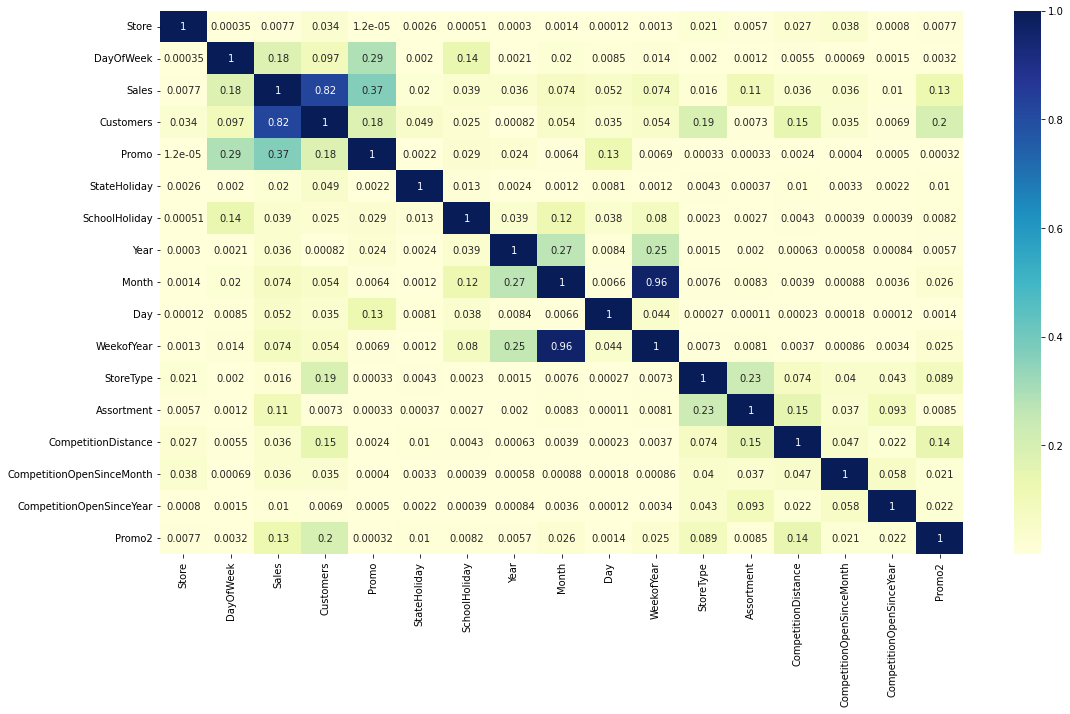

In [ ]:
# correlation heat map
plt.figure(figsize = (18,10))
correlation = joined_data.corr()
sns.heatmap(abs(correlation), annot = True, cmap = 'YlGnBu')

In [ ]:
# Dropping store and date columns because they are irrelevant
joined_data.drop(['Store', 'Date'], axis = 1, inplace = True)

### Variance Inflation Factor

In [ ]:
# importing vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# defining a fuction for vif
def calculate_vif(X):
    """ 
    this function calculates the variance inflation factor
    """
    # VIF calculation
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# calculation
calculate_vif(joined_data[[i for i in joined_data.describe().columns if i not in ['Sales']]])

,variables,VIF
0,DayOfWeek,5.770724
1,Customers,5.401959
2,Promo,2.077081
3,StateHoliday,1.004216
4,SchoolHoliday,1.307883
5,Year,141231.048895
6,Month,57.078750
7,Day,4.585020
8,WeekofYear,51.268335
9,StoreType,1.973250


In [ ]:
# Removing the features which is having VIF>10 because it will affect & interpret the result. 
#VIF <10 is usually preferred as this can easily explain the variance of 90% i.e, R-square becomes 90%.(VIF=1/1-R^2)
calculate_vif(joined_data[[i for i in joined_data.describe().columns if i not in ['Sales','Year','CompetitionOpenSinceYear','Month','WeekOfYear']]])


,variables,VIF
0,DayOfWeek,4.464148
1,Customers,4.320626
2,Promo,1.942942
3,StateHoliday,1.003920
4,SchoolHoliday,1.259958
5,Day,3.868707
6,WeekofYear,3.498616
7,StoreType,1.917065
8,Assortment,2.042204
9,CompetitionDistance,1.535508


In [ ]:
# defining a DataFrame containing on low VIF variables (as we observed above)
joined_data_vif = joined_data[[i for i in joined_data.describe().columns if i not in ['Sales','Year','CompetitionOpenSinceYear','Month','WeekOfYear']]].head()
joined_data_vif.head()

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,Day,WeekofYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,Promo2
0,5,555,1,0,1,31,31,2,0,1270.0,9.0,0
1,5,625,1,0,1,31,31,0,0,570.0,11.0,1
2,5,821,1,0,1,31,31,0,0,14130.0,12.0,1
3,5,1498,1,0,1,31,31,2,2,620.0,9.0,0
4,5,559,1,0,1,31,31,0,0,29910.0,4.0,0


# ML Model Building

Importing ML models and evaluation metrics

In [ ]:
# Machine Learning
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
# Evaluation Metrics
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

We will make a copy of merged dataframe to use it for linear regression and elastic net regression. We will use the log of 'Sales' and 'Customers' columns because it will remove the hetroscadasticity of the linear relationship betwwen then (we observed above in target columns vs numerical freatures).

In [ ]:
# Copy of merged DF
joined_df_lr = joined_data.copy()

In [ ]:
# log10 transformation of 'Sales'
joined_df_lr['Sales'] = np.log10(joined_df_lr['Sales'])

In [ ]:
# Cheching for inf values
np.isinf(joined_df_lr['Sales']).sum()

54

In [ ]:
# droping infinite values after transformation
joined_df_lr.drop(joined_df_lr[joined_df_lr['Sales'] == float("-inf")].index,inplace=True)

In [ ]:
# log10 transformation of 'Customers'
joined_df_lr['Customers'] = np.log10(joined_df_lr['Customers'])

In [ ]:
# Cheching for inf values again
np.isinf(joined_df_lr['Customers']).sum()

0

In [ ]:
# Declaring Independent and dependent variable for linear regression and elastic net
dependent_var = 'Sales'
independent_var = joined_data_vif.columns

In [ ]:
# Creating the datafrmae of independent variables
X = joined_df_lr[independent_var].values

# Creating the dataframe of dependent variable
y = joined_df_lr[dependent_var].values

In [ ]:
# Splitting the Dataset into Test and Train
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# Shape of train data
print(X_train.shape)
# Shape of test data
print(X_test.shape)

(675470, 12)
(168868, 12)


In [ ]:
# Using StandardScaler to normalize the independent variables.
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

##Linear Regression

In [ ]:
# Fitting Multiple Linear Regression to the Training set
# Formation of equation
regressor = LinearRegression()
regressor.fit(scaled_X_train, y_train)

LinearRegression()

In [ ]:
# Intercept of equation
regressor.intercept_

3.803451468689651

In [ ]:
# Model coefficients
regressor.coef_

array([-0.00313102,  0.15987807,  0.03454979, -0.00316687,  0.00103946,
        0.0001687 ,  0.0035701 ,  0.03183488,  0.01031163,  0.01545418,
       -0.00176844,  0.01311864])

In [ ]:
# predicted sales from training dataset
y_pred_train = regressor.predict(scaled_X_train)

# predicted sales from testing dataset
y_pred_test = regressor.predict(scaled_X_test)


In [ ]:
# Defining RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# Defining MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100 

In [ ]:
# Evaluation Metrics for Linear Regression

print("Regresion Model Training Score" , ":" , regressor.score(scaled_X_train, y_train),
      "Model Test Score" ,":" , regressor.score(scaled_X_test, y_test))

print("Training RMSE", ":", rmse(y_train, y_pred_train),
      "Testing RMSE", ":", rmse(y_test, y_pred_test))

print("Training MAPE", ":", mape(y_train, y_pred_train),
      "Testing MAPE", ":", mape(y_test, y_pred_test))

r2 = r2_score(y_test, y_pred_test)
print("R2 :" ,r2)

Regresion Model Training Score : 0.8196695029049197 Model Test Score : 0.8195221949465366
Training RMSE : 0.07839876139614388 Testing RMSE : 0.07859547137893501
Training MAPE : 1.6059408754568734 Testing MAPE : 1.6081262123392996
R2 : 0.8195221949465366


In [ ]:
# Performance of the model
r2s_lr = r2_score(y_train,y_pred_train)
r2s2_lr = r2_score(y_test,y_pred_test)

mae_lr = mae(y_train,y_pred_train)
mae2_lr = mae(y_test,y_pred_test)

rmse_lr = math.sqrt(mse(y_train,y_pred_train))
rmse2_lr = math.sqrt(mse(y_test,y_pred_test))

mse_lr = mse(y_train,y_pred_train)
mse2_lr = mse(y_test,y_pred_test)

print('Performance of Linear Regression Model:')
print('-'*40)

print('r2_score train:',r2s_lr)
print('r2_score test:',r2s_lr)

print('\nMean absolute error train: %.2f' % mae_lr)
print('Mean absolute error test: %.2f' % mae_lr)

print('\nRoot mean squared error train: ', rmse_lr)
print('Root mean squared error test: ', rmse_lr)

print('\nMean Sq error train: %.2f' % mse_lr)
print('Mean Sq error test: %.2f' % mse_lr)

Performance of Linear Regression Model:
----------------------------------------
r2_score train: 0.8196695029049197
r2_score test: 0.8196695029049197

Mean absolute error train: 0.06
Mean absolute error test: 0.06

Root mean squared error train:  0.07839876139614388
Root mean squared error test:  0.07839876139614388

Mean Sq error train: 0.01
Mean Sq error test: 0.01


Text(0, 0.5, 'Predicted values')

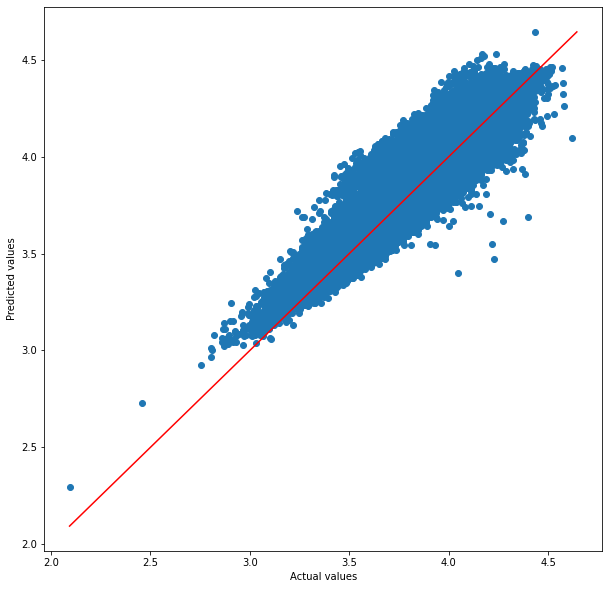

In [ ]:
# Showing the optimally fitted line
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred_test)

p1 = max(max(y_pred_test),max(y_test))
p2 = min(min(y_pred_test),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

## Elastic Net Regression

In [ ]:
# ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
# Model fitting
elasticnet.fit(scaled_X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
# Elasticnet score
elasticnet.score(scaled_X_train, y_train)

0.6394617895674002

In [ ]:
# Predicting test set
y_pred_en = elasticnet.predict(scaled_X_test)

In [ ]:
MSE  = mse(y_test, y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_en)
print("R2 :" ,r2)

MSE : 0.012318562564570493
RMSE : 0.11098902001806527
R2 : 0.6400942475647475


### Gridsearchcv for Elastic Net Regression

In [ ]:
# Hyperparameter tuning for elasticnet
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
# predicted values after hyperparameter tuning
y_pred_elastic = elastic_regressor.predict(scaled_X_test)

In [ ]:
# print
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-13, 'l1_ratio': 0.7}

Using  {'alpha': 1e-13, 'l1_ratio': 0.7}  the negative mean squared error is:  -0.006146579983066834


In [ ]:
# model performance metrics

MSE  = mse(y_test, y_pred_elastic)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_elastic)
print("R2 :" ,r2)
# print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.0061772481212769405
RMSE : 0.07859547137893468
R2 : 0.8195221949465381


## Xgboost Model


In [ ]:
# decalring independent and dependent variables
target_col = 'Sales'
input_cols = joined_data.columns.drop(target_col)
input_cols

Index(['DayOfWeek', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'Year', 'Month', 'Day', 'WeekofYear', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2'],
      dtype='object')

We will use these independent and dependent variables for Xgboost, Decision Tree and Random forest because previous independent and dependent variables contain log10 transformation of 'Sales' and 'Customers' columns also, the following three models can handle multicolinearity.

In [ ]:
# train test split
X_train, X_test, y_train, y_test  = train_test_split(joined_data[input_cols], joined_data[target_col], test_size = 0.2, random_state = 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((675513, 15), (168879, 15), (675513,), (168879,))

In [ ]:
# standard scaler to nornamlise the data
scaler = StandardScaler()
scale_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.transform(X_test)
scale_X_train[0:10]

array([[-0.8815276 , -0.46869897, -0.89902131, -0.03250553, -0.49058676,
         0.21666672, -0.5554607 ,  0.70992766, -0.46210831, -0.88400422,
         1.0708068 , -0.39986315,  0.43604524,  0.55287989, -0.99743782],
       [ 0.8590309 ,  0.34962299,  1.11232069, -0.03250553, -0.49058676,
         1.50286095, -0.85628505, -1.13234466, -0.94854509,  1.31661763,
         1.0708068 , -0.34207839, -0.64433529,  0.92993265, -0.99743782],
       [-1.46171377,  1.72929385,  1.11232069, -0.03250553,  2.03837543,
        -1.06952751,  1.24948541,  0.59478564,  1.34465688,  1.31661763,
         1.0708068 , -0.64512738, -0.64433529,  0.74140627, -0.99743782],
       [ 1.43921706, -0.71070272, -0.89902131, -0.03250553, -0.49058676,
         0.21666672, -0.25463634,  1.74620584, -0.11465347, -0.88400422,
        -0.943055  , -0.66567307,  0.79617208, -0.76680479,  1.00256876],
       [-0.8815276 ,  1.17043983,  1.11232069, -0.03250553, -0.49058676,
        -1.06952751,  0.04618801,  0.24935958, 

In [ ]:
# Building XGBoost Regressor Model:
xgb = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)
xgb.fit(scale_X_train,y_train)

y_predict_xgb = xgb.predict(scale_X_test)

[15:27:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Performance of the model
r2s_xgb = r2_score(y_test,y_predict_xgb)
mae_xgb = mae(y_test,y_predict_xgb)
rmse_xgb = math.sqrt(mse(y_test,y_predict_xgb))
print('Performance of XGBoost Regressor Model:')
print('-'*40)
print('r2_score:',r2s_xgb)
print('Mean absolute error: %.2f' % mae_xgb)
print('Root mean squared error: ', rmse_xgb)

Performance of XGBoost Regressor Model:
----------------------------------------
r2_score: 0.7403704122495233
Mean absolute error: 1112.74
Root mean squared error:  1585.4456652303052


## DecisionTree Model

In [ ]:
# Building Decesion Tree Regressor Model:

model = DecisionTreeRegressor()
model.fit(scale_X_train,y_train)

y_predict_dt = model.predict(scale_X_test)

In [ ]:
# Performance of the model
r2s_3 = r2_score(y_test,y_predict_dt)
mae3 = mae(y_test,y_predict_dt)
rmse3 = math.sqrt(mse(y_test,y_predict_dt))
print('Performance of Decesion Tree Model:')
print('-'*40)
print('r2_score:',r2s_3)
print('Mean absolute error: %.2f' % mae3)
print('Root mean squared error: ', rmse3)

Performance of Decesion Tree Model:
----------------------------------------
r2_score: 0.9470616765008384
Mean absolute error: 469.38
Root mean squared error:  715.9115396889298


## Random Forest Regression Model

In [ ]:
# Building Random Forest Regressor Model:

random_forest_model = RandomForestRegressor(n_estimators=100)
random_forest_model.fit(scale_X_train,y_train)

y_predict_rf = random_forest_model.predict(scale_X_test)

In [ ]:
# Performance of the model
r2s_4 = r2_score(y_test,y_predict_rf)
mae4 = mae(y_test,y_predict_rf)
rmse4 = math.sqrt(mse(y_test,y_predict_rf))
print('Performance of Random Forest Regression Model:')
print('-'*40)
print('r2_score:', r2s_4)
print('Mean absolute error: %.2f' % mae4)
print('Root mean squared error: ', rmse4)

Performance of Random Forest Regression Model:
----------------------------------------
r2_score: 0.9738996901716971
Mean absolute error: 330.97
Root mean squared error:  502.6863614656424


### Hyperparameter tuning for RandomForest

In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
rfr = RandomForestRegressor(random_state = 1)
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(scale_X_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}


In [ ]:
# Model prediction train set
y_pred_RandomForest_tuned_train = g_search.predict(scale_X_train)

In [ ]:
# Model prediction test set
y_pred_RandomForest_tuned_test = g_search.predict(scale_X_test)

In [ ]:
print("Regresion Model Training Score" , ":" , g_search.score(scale_X_train, y_train),
      "Model Test Score" ,":" , g_search.score(scale_X_test, y_test))

print("Training RMSE", ":", rmse(y_train, y_pred_RandomForest_tuned_train),
      "Testing RMSE", ":", rmse(y_test, y_pred_RandomForest_tuned_test))

print("Training MAPE", ":", mape(y_train, y_pred_RandomForest_tuned_train),
      "Testing MAPE", ":", mape(y_test, y_pred_RandomForest_tuned_test))

r2 = r2_score(y_test, y_pred_RandomForest_tuned_test)
print("R2 :" ,r2)

Regresion Model Training Score : 0.9951872581470871 Model Test Score : 0.9718531028045149
Training RMSE : 215.22426728466945 Testing RMSE : 522.0228753876654
Training MAPE : 2.017057620238997 Testing MAPE : inf
R2 : 0.9718531028045149


### Feature importance

In [ ]:
#Lets Find Importance of each Feature
feature_importance = random_forest_model.feature_importances_ 

In [ ]:
# Lets make a dataframe consists of features and values
columns_1 = list(X_train.columns)
feature_importance_df = pd.DataFrame({'Features':columns_1, 'Importance':feature_importance})
feature_importance_df.set_index('Features', inplace=True)
feature_importance_df.sort_values(by= 'Importance', ascending = False, inplace = True)
feature_importance_df

,Importance
Features,
Customers,0.738056
CompetitionDistance,0.079076
StoreType,0.059796
Promo,0.034720
CompetitionOpenSinceYear,0.018791
CompetitionOpenSinceMonth,0.016378
Assortment,0.012634
DayOfWeek,0.011343
Promo2,0.008149


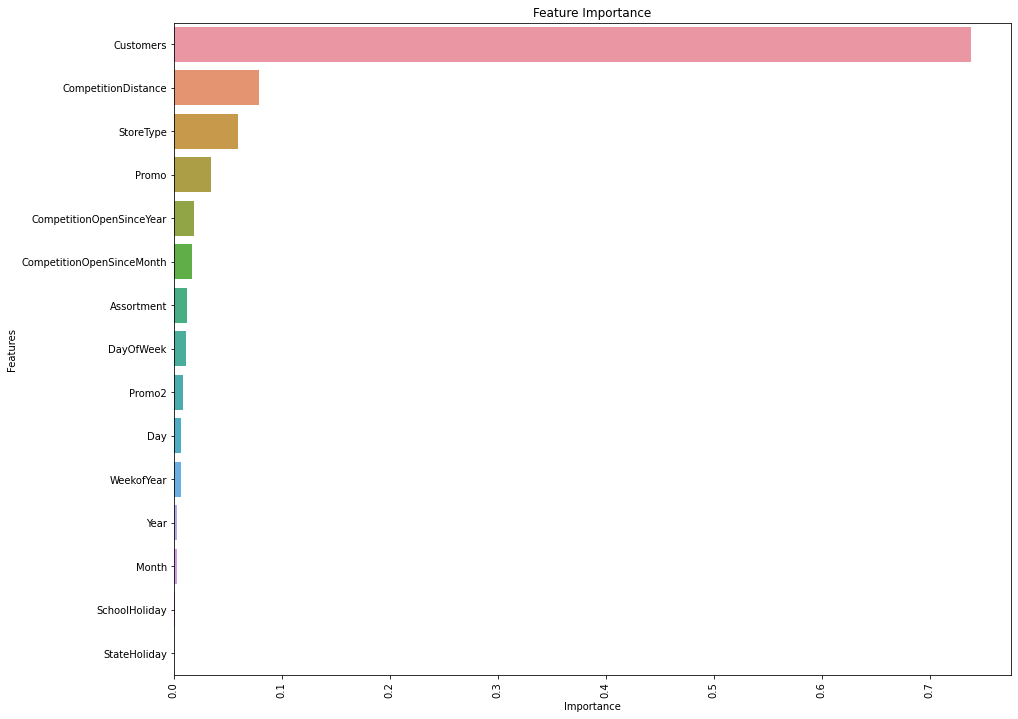

In [ ]:
# Feature Importance
Features_imp = feature_importance_df.index

plt.figure(figsize=(15,12))
sns.barplot(y= Features_imp, x=feature_importance_df['Importance'], data = feature_importance_df ).set(title='Feature Importance')
plt.xticks(rotation=90)
plt.show()

Observation:- As per our model; Customer, store Type, CompetitionDistance and Promo are the most important features which are having the most impact on Target Variable i.e. Sales Column.

### Conclusion from ML models

By Looking at the evaluation metrices obtained on implementing different sort of regression model, we decided to go with the Random Forest Tuned model.The maximum R^2 was seen in tuned Random Forest model with the value 0.97185. It means our best accurate model is able to explain approx/almost 97% of variances in the datasets.

Based on our model; Customer, store Type, Promo & CompetitionDistance are the most impactful features which are driving the sales more as compared to other features present in the dataset.

## Suggestions from our Analysis

1. More stores should be encouraged for promotion.

2. Store type 'b' should be increased in number.

3. There is seasonality involved. Hence, the stores should be encouraged to promote and take advantages of the holidays.


**THANK YOU...** 

**Hope our best model will help the Store managers to predict the daily sales accuartely in advance. CHEERS ✌!!!**